In [ ]:
from google.colab import files
uploaded = files.upload()

Saving co2_emissions_from_agri (3).csv to co2_emissions_from_agri (3).csv


# Task
Analyze the impact of agricultural activities on CO2 emissions and climate change using the uploaded dataset, perform EDA, data preprocessing, build and evaluate regression models (including ensembling/bootstrapping), and provide actionable insights and recommendations for agricultural stakeholders.

## Data loading

### Subtask:
Load the uploaded CO2 emissions data into a pandas DataFrame.


**Reasoning**:
Import the pandas library and load the CSV data into a DataFrame, then display the head of the DataFrame to verify the loading.



In [ ]:
import pandas as pd

df = pd.read_csv('co2_emissions_from_agri (3).csv')
df.head()

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.00,0.0,11.807483,63.1152,-2388.803,...,319.1763,0.0,0.0,NaN,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.16,0.0,11.712073,61.2125,-2388.803,...,342.3079,0.0,0.0,NaN,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.00,0.0,11.712073,53.3170,-2388.803,...,349.1224,0.0,0.0,NaN,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.00,0.0,11.712073,54.3617,-2388.803,...,352.2947,0.0,0.0,NaN,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.60,0.0,11.712073,53.9874,-2388.803,...,367.6784,0.0,0.0,NaN,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250


## Exploratory data analysis (eda)

### Subtask:
Perform a thorough EDA to understand the dataset, identify key emission sources, trends over time, and potential relationships between variables. This will include visualizations and summary statistics.


**Reasoning**:
I will display the first 5 rows of the DataFrame, print column names and data types, generate descriptive statistics, and check for missing values to get an initial understanding of the data as requested in the instructions.



In [ ]:
# Display the first 5 rows
display(df.head())

# Print column names and their data types
print(df.info())

# Generate descriptive statistics for numerical columns
display(df.describe())

# Check for missing values
display(df.isnull().sum())

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.00,0.0,11.807483,63.1152,-2388.803,...,319.1763,0.0,0.0,NaN,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.16,0.0,11.712073,61.2125,-2388.803,...,342.3079,0.0,0.0,NaN,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.00,0.0,11.712073,53.3170,-2388.803,...,349.1224,0.0,0.0,NaN,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.00,0.0,11.712073,54.3617,-2388.803,...,352.2947,0.0,0.0,NaN,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.60,0.0,11.712073,53.9874,-2388.803,...,367.6784,0.0,0.0,NaN,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6965 entries, 0 to 6964
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Area                             6965 non-null   object 
 1   Year                             6965 non-null   int64  
 2   Savanna fires                    6934 non-null   float64
 3   Forest fires                     6872 non-null   float64
 4   Crop Residues                    5576 non-null   float64
 5   Rice Cultivation                 6965 non-null   float64
 6   Drained organic soils (CO2)      6965 non-null   float64
 7   Pesticides Manufacturing         6965 non-null   float64
 8   Food Transport                   6965 non-null   float64
 9   Forestland                       6472 non-null   float64
 10  Net Forest conversion            6472 non-null   float64
 11  Food Household Consumption       6492 non-null   float64
 12  Food Retail         

,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
count,6965.000000,6934.000000,6872.000000,5576.000000,6965.000000,6965.000000,6965.000000,6965.000000,6472.000000,6.472000e+03,...,6037.000000,6965.000000,6810.000000,6009.000000,6.965000e+03,6.965000e+03,6.965000e+03,6.965000e+03,6.965000e+03,6965.000000
mean,2005.124910,1188.390893,919.302167,998.706309,4259.666673,3503.228636,333.418393,1939.581760,-17828.285678,1.760564e+04,...,2263.344946,1210.315532,668.452931,3008.982252,1.785774e+07,1.693230e+07,1.761963e+07,1.732447e+07,6.409124e+04,0.872989
std,8.894665,5246.287783,3720.078752,3700.345330,17613.825187,15861.445678,1429.159367,5616.748808,81832.210543,1.011575e+05,...,7980.542461,22669.847760,3264.879486,12637.864430,8.901521e+07,6.574362e+07,7.603993e+07,7.251711e+07,2.283130e+05,0.555930
min,1990.000000,0.000000,0.000000,0.000200,0.000000,0.000000,0.000000,0.000100,-797183.079000,0.000000e+00,...,0.432900,0.000000,0.000000,0.031900,0.000000e+00,0.000000e+00,2.500000e+02,2.700000e+02,-3.918841e+05,-1.415833
25%,1997.000000,0.000000,0.000000,11.006525,181.260800,0.000000,6.000000,27.958600,-2848.350000,0.000000e+00,...,37.632100,0.000000,0.000000,13.291900,9.731100e+04,2.173860e+05,2.013260e+05,2.078900e+05,5.221244e+03,0.511333
50%,2005.000000,1.651850,0.517900,103.698200,534.817400,0.000000,13.000000,204.962800,-62.920000,4.444000e+01,...,269.856300,0.000000,0.000000,141.096300,1.595322e+06,2.357581e+06,2.469660e+06,2.444135e+06,1.214765e+04,0.834300
75%,2013.000000,111.081400,64.950775,377.640975,1536.640000,690.408800,116.325487,1207.000900,0.000000,4.701746e+03,...,1126.818900,0.000000,9.577875,1136.925400,8.177340e+06,8.277123e+06,9.075924e+06,9.112588e+06,3.513973e+04,1.206750
max,2020.000000,114616.401100,52227.630600,33490.074100,164915.255600,241025.069600,16459.000000,67945.765000,171121.076000,1.605106e+06,...,70592.646500,991717.543100,51771.256800,248879.176900,9.000991e+08,9.020778e+08,7.435866e+08,7.133419e+08,3.115114e+06,3.558083


,0
Area,0
Year,0
Savanna fires,31
Forest fires,93
Crop Residues,1389
Rice Cultivation,0
Drained organic soils (CO2),0
Pesticides Manufacturing,0
Food Transport,0
Forestland,493


**Reasoning**:
I will calculate and display the correlation matrix for the numerical columns to understand the relationships between variables as requested.



In [ ]:
# Calculate the correlation matrix
correlation_matrix = df.corr(numeric_only=True)
display(correlation_matrix)

,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
Year,1.000000,-0.011911,-0.008902,0.031410,0.001641,0.004470,0.023444,0.060122,0.003590,-0.023792,...,0.000304,-0.004047,-0.002642,-0.008368,-0.002781,0.050259,0.021208,0.021612,0.041861,0.545932
Savanna fires,-0.011911,1.000000,0.507098,0.026309,-0.030414,0.016874,0.060794,0.070335,-0.058412,0.226274,...,0.026728,-0.004603,0.448486,0.022723,0.000406,0.021624,0.008364,0.010889,0.128680,-0.046588
Forest fires,-0.008902,0.507098,1.000000,0.075935,0.070997,0.107947,0.052947,0.071083,-0.150876,0.420323,...,0.064931,0.126871,0.941966,0.059562,0.077881,0.084855,0.082499,0.086386,0.238744,-0.038104
Crop Residues,0.031410,0.026309,0.075935,1.000000,0.826125,0.208585,0.875560,0.769346,-0.737550,0.119842,...,0.968376,0.044772,0.013251,0.874763,0.837061,0.940413,0.911323,0.917182,0.834208,0.019434
Rice Cultivation,0.001641,-0.030414,0.070997,0.826125,1.000000,0.236545,0.596904,0.433016,-0.506651,0.063845,...,0.804137,0.182468,0.032131,0.714805,0.937768,0.852414,0.935715,0.934319,0.756638,-0.022532
Drained organic soils (CO2),0.004470,0.016874,0.107947,0.208585,0.236545,1.000000,0.161667,0.307628,-0.330150,0.216167,...,0.216299,0.654243,0.078133,0.183691,0.104755,0.183084,0.139708,0.148775,0.292664,0.029030
Pesticides Manufacturing,0.023444,0.060794,0.052947,0.875560,0.596904,0.161667,1.000000,0.800226,-0.693223,0.152004,...,0.875753,-0.003529,0.012074,0.813546,0.600570,0.798785,0.703552,0.712985,0.746777,0.027960
Food Transport,0.060122,0.070335,0.071083,0.769346,0.433016,0.307628,0.800226,1.000000,-0.703873,0.184754,...,0.762156,0.049817,0.008494,0.719126,0.422881,0.710225,0.560014,0.573192,0.657877,0.075724
Forestland,0.003590,-0.058412,-0.150876,-0.737550,-0.506651,-0.330150,-0.693223,-0.703873,1.000000,-0.359537,...,-0.724885,-0.112611,-0.075786,-0.728659,-0.481449,-0.707840,-0.591858,-0.605698,-0.642963,-0.049274
Net Forest conversion,-0.023792,0.226274,0.420323,0.119842,0.063845,0.216167,0.152004,0.184754,-0.359537,1.000000,...,0.077252,0.195851,0.458724,0.085844,0.033066,0.139659,0.079122,0.085289,0.430438,-0.031555


**Reasoning**:
I will create line plots to visualize the trends of total emissions and key emission sources over time, create box plots to visualize the distribution of key emission sources across different areas, create scatter plots to visualize the relationship between total emissions and average temperature, and population variables with total emissions, and create histograms to visualize the distributions of key numerical variables as requested in the instructions.



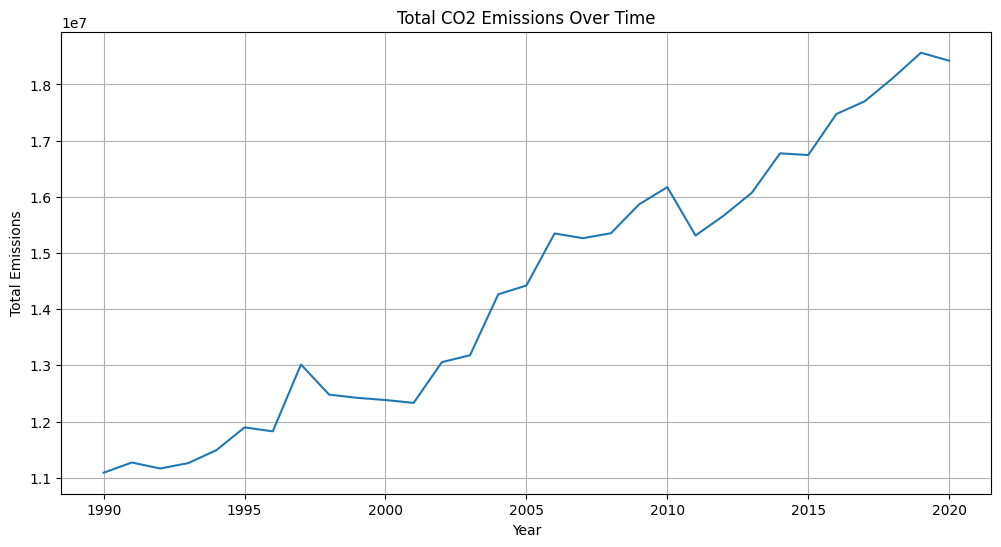

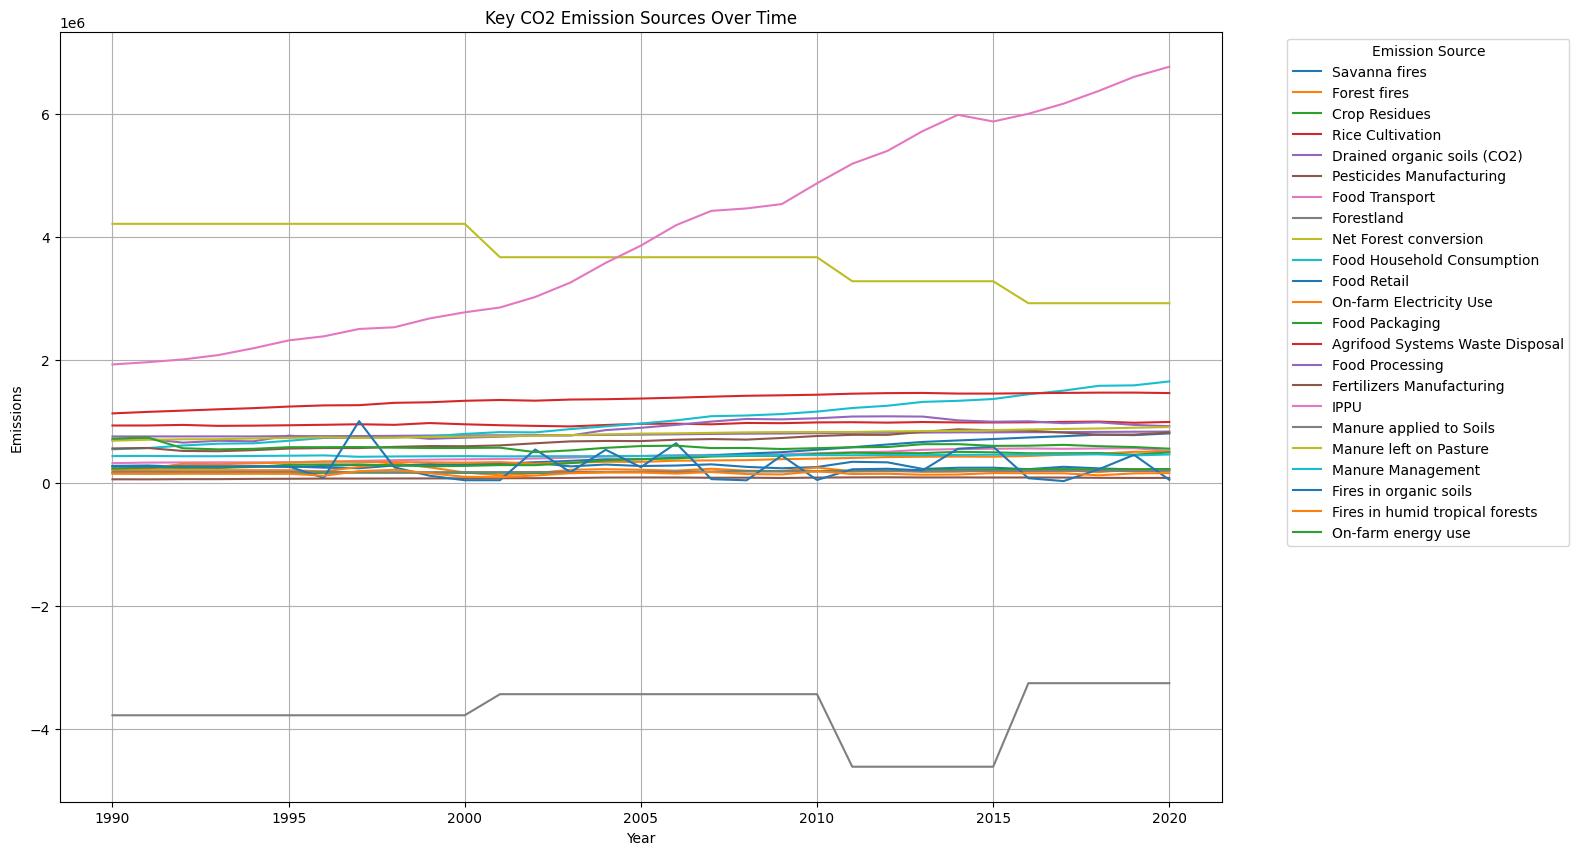

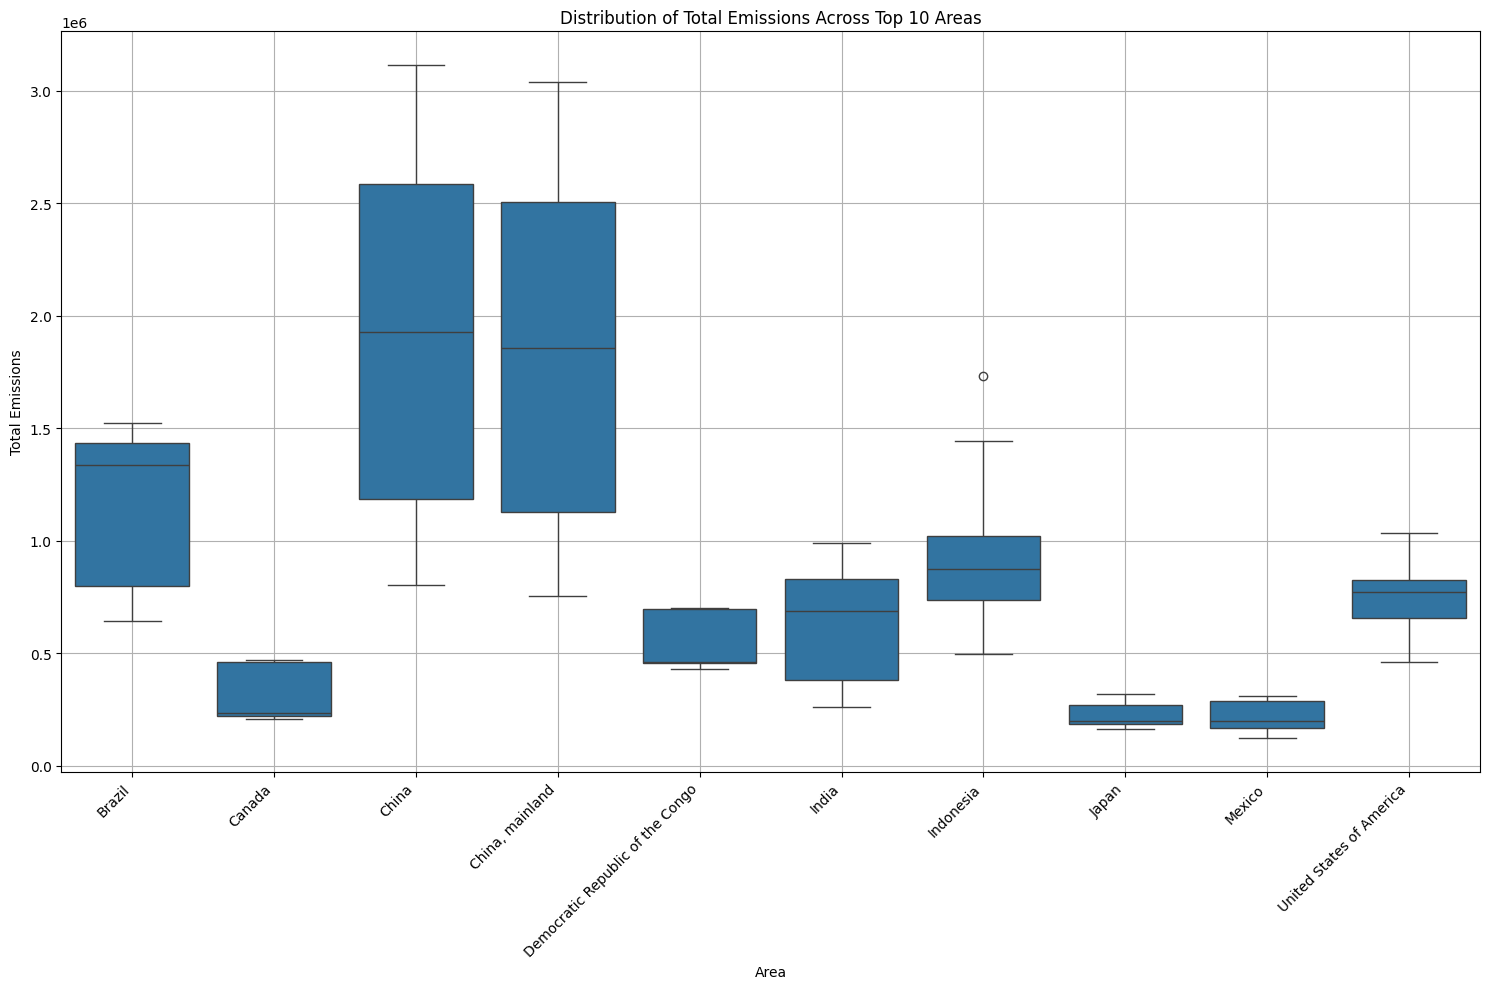

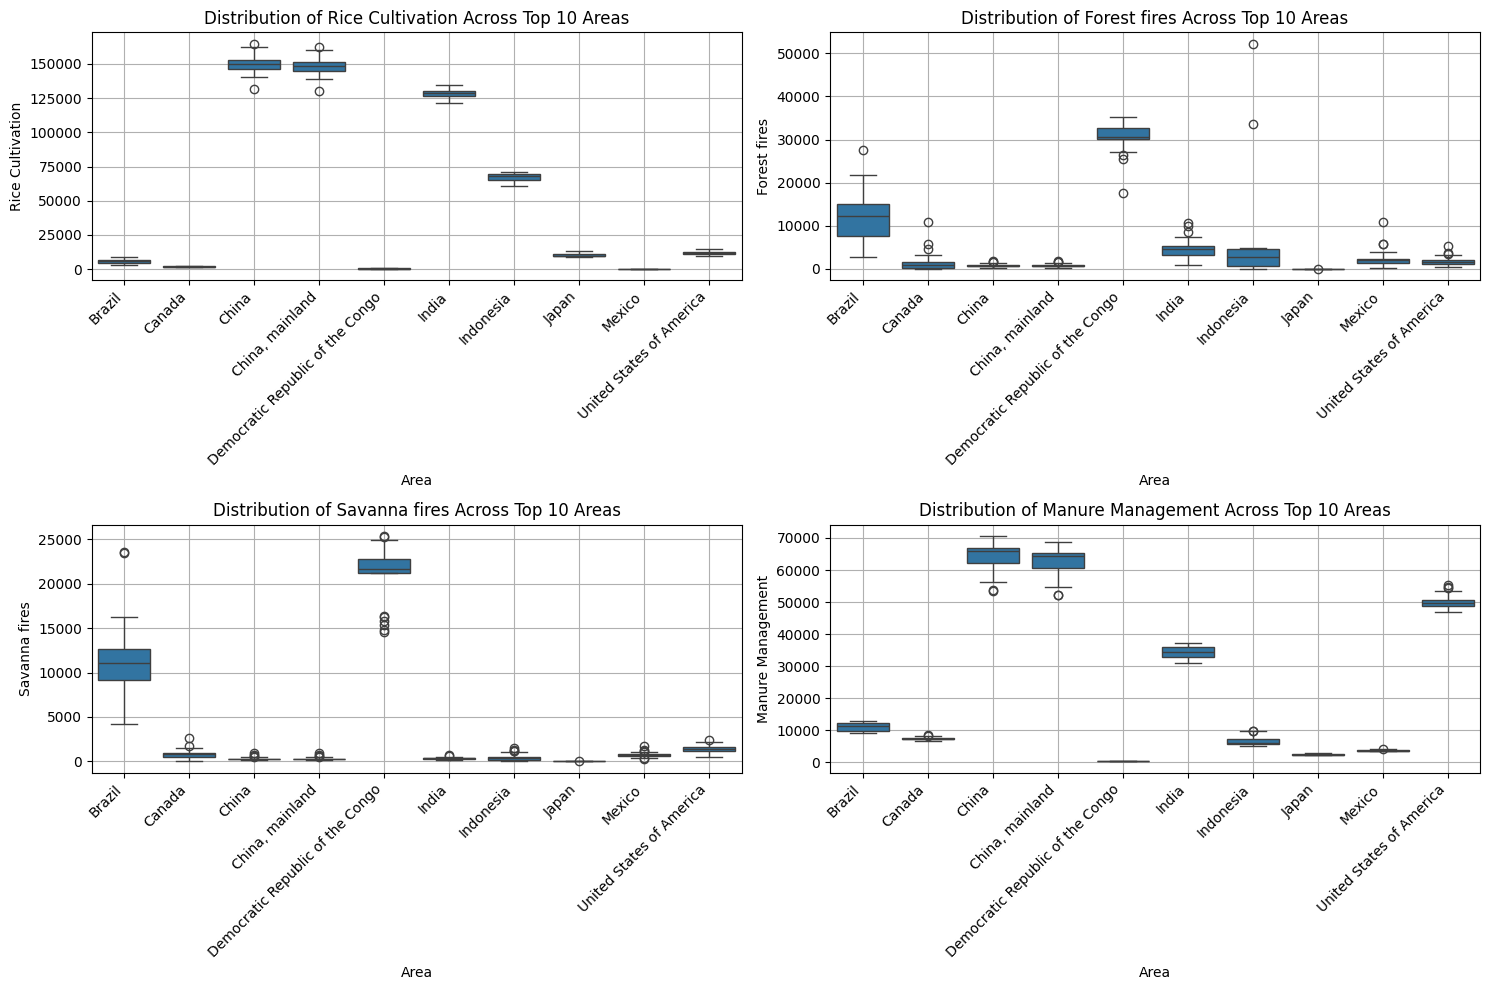

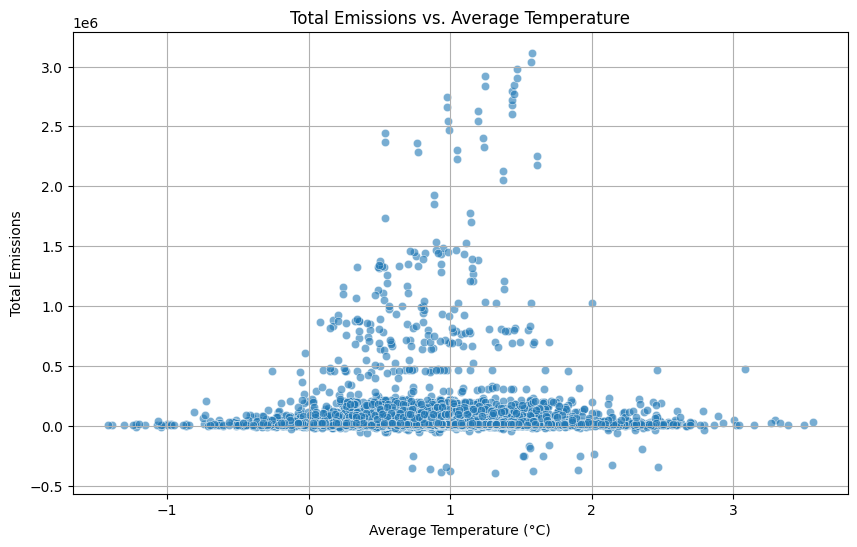

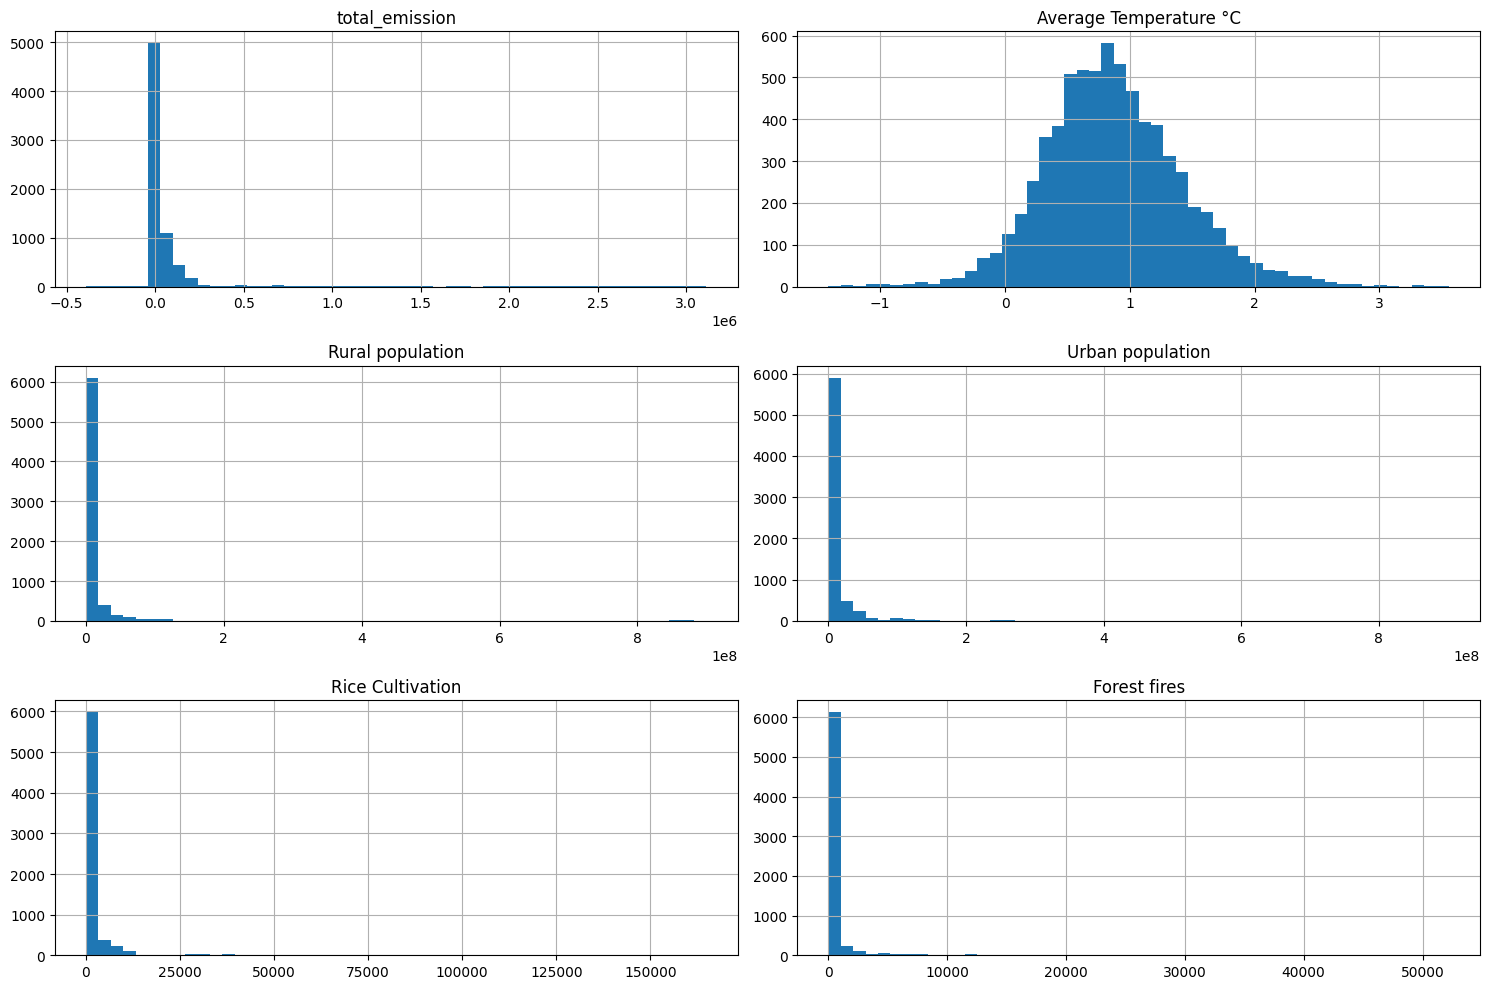

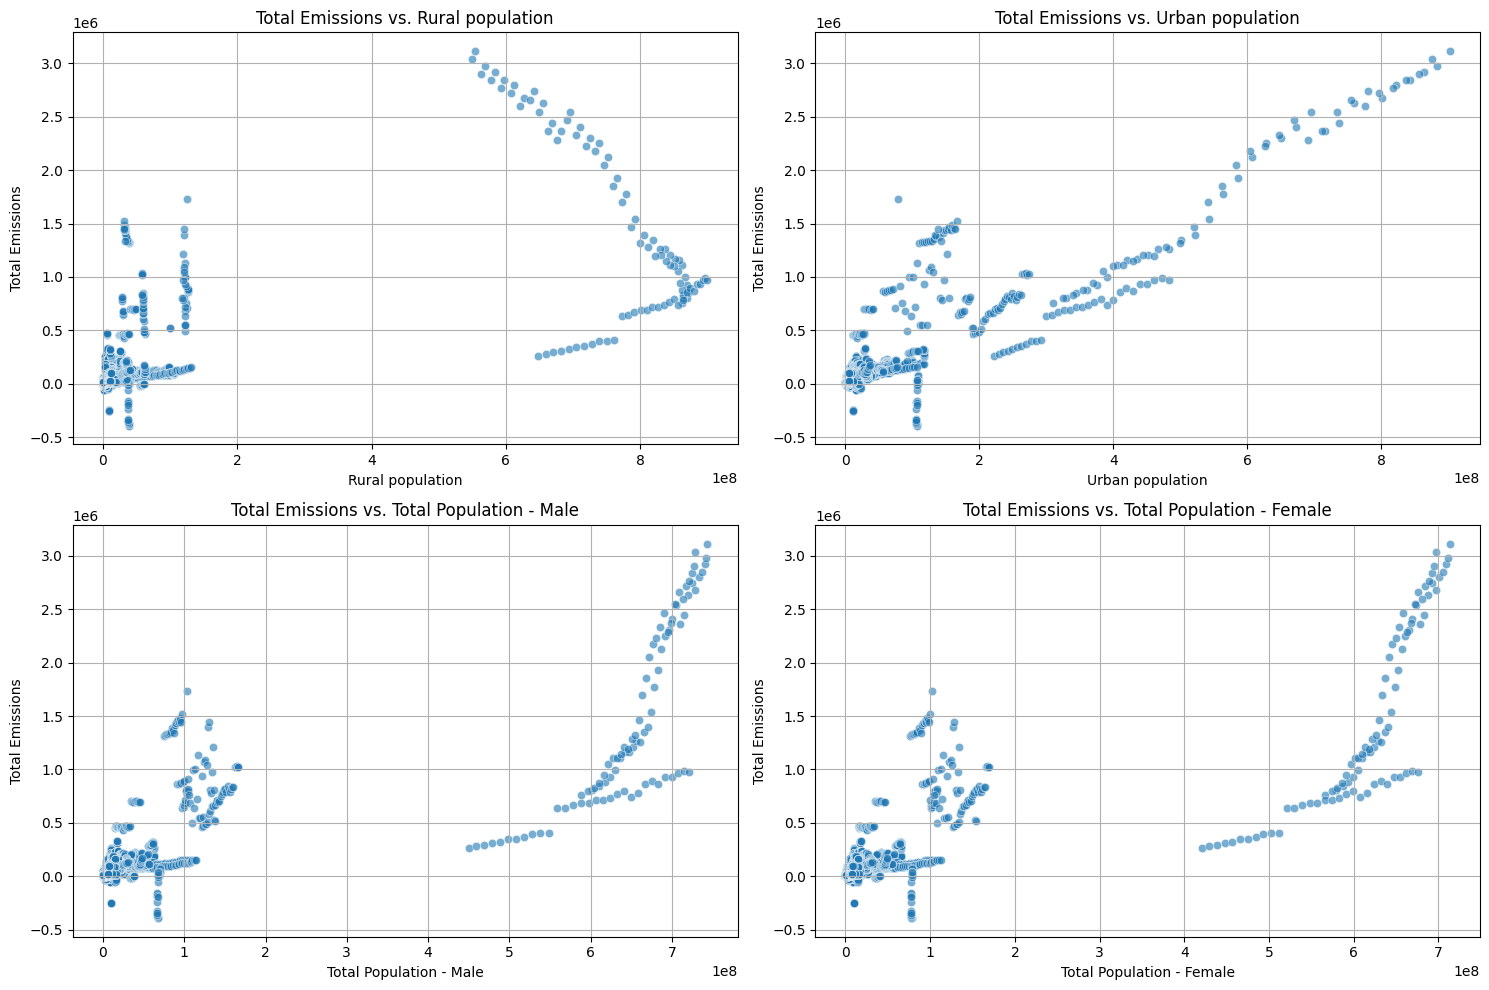

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by year and sum the emissions for trend analysis
yearly_emissions = df.groupby('Year')['total_emission'].sum().reset_index()

# Create line plot for total emissions over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_emissions, x='Year', y='total_emission')
plt.title('Total CO2 Emissions Over Time')
plt.xlabel('Year')
plt.ylabel('Total Emissions')
plt.grid(True)
plt.show()

# Identify key emission source columns (excluding 'Area' and 'Year' and 'total_emission' and population columns and temperature)
emission_cols = df.columns.drop(['Area', 'Year', 'total_emission', 'Rural population', 'Urban population', 'Total Population - Male', 'Total Population - Female', 'Average Temperature °C'])

# Group by year and sum for key emission sources
yearly_emission_sources = df.groupby('Year')[emission_cols].sum().reset_index()

# Create line plots for key emission sources over time
plt.figure(figsize=(15, 10))
for col in emission_cols:
    sns.lineplot(data=yearly_emission_sources, x='Year', y=col, label=col)
plt.title('Key CO2 Emission Sources Over Time')
plt.xlabel('Year')
plt.ylabel('Emissions')
plt.legend(title='Emission Source', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

# Create box plots for distribution of key emission sources across areas (sample a few areas for clarity)
# Get the top 10 areas by total emissions for visualization
top_areas = df.groupby('Area')['total_emission'].sum().nlargest(10).index

df_top_areas = df[df['Area'].isin(top_areas)]

plt.figure(figsize=(15, 10))
sns.boxplot(data=df_top_areas, x='Area', y='total_emission')
plt.title('Distribution of Total Emissions Across Top 10 Areas')
plt.xlabel('Area')
plt.ylabel('Total Emissions')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

# Select a few key emission sources to visualize across top areas
key_sources_for_boxplot = ['Rice Cultivation', 'Forest fires', 'Savanna fires', 'Manure Management']

plt.figure(figsize=(15, 10))
for i, col in enumerate(key_sources_for_boxplot):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(data=df_top_areas, x='Area', y=col)
    plt.title(f'Distribution of {col} Across Top 10 Areas')
    plt.xlabel('Area')
    plt.ylabel(col)
    plt.xticks(rotation=45, ha='right')
    plt.grid(True)
plt.tight_layout()
plt.show()


# Visualize the relationship between total emissions and average temperature
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Average Temperature °C', y='total_emission', alpha=0.6)
plt.title('Total Emissions vs. Average Temperature')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Total Emissions')
plt.grid(True)
plt.show()

# Analyze the distributions of key numerical variables using histograms
# Select a few key numerical variables for histograms
key_numerical_cols = ['total_emission', 'Average Temperature °C', 'Rural population', 'Urban population', 'Rice Cultivation', 'Forest fires']

df[key_numerical_cols].hist(figsize=(15, 10), bins=50)
plt.tight_layout()
plt.show()

# Investigate the relationship between population variables and total emissions using scatter plots
population_cols = ['Rural population', 'Urban population', 'Total Population - Male', 'Total Population - Female']

plt.figure(figsize=(15, 10))
for i, col in enumerate(population_cols):
    plt.subplot(2, 2, i + 1)
    sns.scatterplot(data=df, x=col, y='total_emission', alpha=0.6)
    plt.title(f'Total Emissions vs. {col}')
    plt.xlabel(col)
    plt.ylabel('Total Emissions')
    plt.grid(True)
plt.tight_layout()
plt.show()

## Data preprocessing

### Subtask:
Prepare the data for modeling. This might involve handling missing values, feature engineering, and scaling numerical features.


**Reasoning**:
Address missing values using imputation, drop the 'Area' column, separate features (X) and target (y), and scale the feature columns using StandardScaler, then convert scaled features back to a DataFrame.



In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import numpy as np

# 1. Address missing values
# Impute missing values with the mean of each column
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df.drop('Area', axis=1)), columns=df.drop('Area', axis=1).columns)

# 2. Drop the 'Area' column (already handled during imputation by dropping it)

# 3. Identify feature columns (X) and target variable (y)
X = df_imputed.drop('total_emission', axis=1)
y = df_imputed['total_emission']

# 4. Scale the numerical feature columns (X)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. Convert the scaled features back into a pandas DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

display(X_scaled_df.head())
display(y.head())

,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,...,Manure left on Pasture,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,Average Temperature °C
0,-1.700569,-0.22423,-0.248789,-0.239565,-0.202904,-0.22088,-0.225051,-0.334108,0.195742,-0.180563,...,-0.211745,-0.261690,-0.053393,-0.207073,-3.874290e-17,-0.092155,-0.218111,-0.161391,-0.165187,-0.605916
1,-1.588134,-0.22423,-0.248789,-0.238390,-0.203350,-0.22088,-0.225118,-0.334447,0.195742,-0.180563,...,-0.204417,-0.258577,-0.053393,-0.207073,-3.874290e-17,-0.085691,-0.215536,-0.161067,-0.164832,-1.533258
2,-1.475699,-0.22423,-0.248789,-0.242306,-0.202904,-0.22088,-0.225118,-0.335853,0.195742,-0.180563,...,-0.204827,-0.257659,-0.053393,-0.207073,-3.874290e-17,-0.077095,-0.212152,-0.152446,-0.155775,-2.037405
3,-1.363264,-0.22423,-0.248789,-0.231950,-0.202904,-0.22088,-0.225118,-0.335667,0.195742,-0.180563,...,-0.205985,-0.257232,-0.053393,-0.207073,-3.874290e-17,-0.067405,-0.208329,-0.139621,-0.142381,-1.387096
4,-1.250829,-0.22423,-0.248789,-0.228557,-0.201792,-0.22088,-0.225118,-0.335733,0.195742,-0.180563,...,-0.200888,-0.255162,-0.053393,-0.207073,-3.874290e-17,-0.058057,-0.204593,-0.130022,-0.132425,-0.900789


,total_emission
0,2198.963539
1,2323.876629
2,2356.304229
3,2368.470529
4,2500.768729


## Regression analysis - initial model

### Subtask:
Build a baseline regression model to predict a relevant target variable (e.g., temperature variation if available in the dataset, or a proxy for climate impact).


**Reasoning**:
Split the data into training and testing sets and then instantiate and fit a Linear Regression model.



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Split the scaled features and the target variable into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42)

# Instantiate a Linear Regression model object
model = LinearRegression()

# Fit the instantiated Linear Regression model to the training data
model.fit(X_train, y_train)

LinearRegression()

**Reasoning**:
The Linear Regression model has been trained. Now evaluate the model by calculating the R-squared score on the test set.



In [ ]:
# Evaluate the model
r_squared = model.score(X_test, y_test)
print(f'R-squared score: {r_squared}')

R-squared score: 0.9994429359636732


## Model evaluation

### Subtask:
Evaluate the performance of the initial model using appropriate metrics.


**Reasoning**:
Use the fitted model to make predictions on the test set and calculate the MSE and MAE.



In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Print the evaluation metrics
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')

Mean Squared Error (MSE): 38534099.66622318
Mean Absolute Error (MAE): 4334.57179811377


## Advanced modeling (ensembling/bootstrapping)

### Subtask:
Implement ensembling or bootstrapping techniques with different regression models to potentially improve prediction accuracy and model robustness.


**Reasoning**:
Implement bagging with a Random Forest base estimator to improve model robustness and potentially accuracy.



In [1]:
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor

# Instantiate a RandomForestRegressor model
rf = RandomForestRegressor(random_state=42)

# Instantiate a BaggingRegressor model with the RandomForestRegressor as the base estimator
bagging_model = BaggingRegressor(base_estimator=rf, random_state=42)

# Fit the BaggingRegressor model to the training data
bagging_model.fit(X_train, y_train)

TypeError: BaggingRegressor.__init__() got an unexpected keyword argument 'base_estimator'

**Reasoning**:
The traceback indicates that the `BaggingRegressor` constructor in the current scikit-learn version does not accept the `base_estimator` argument. I need to use `estimator` instead of `base_estimator`.



In [ ]:
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor

# Instantiate a RandomForestRegressor model
rf = RandomForestRegressor(random_state=42)

# Instantiate a BaggingRegressor model with the RandomForestRegressor as the base estimator
bagging_model = BaggingRegressor(estimator=rf, random_state=42)

# Fit the BaggingRegressor model to the training data
bagging_model.fit(X_train, y_train)

BaggingRegressor(estimator=RandomForestRegressor(random_state=42),
                 random_state=42)

**Reasoning**:
The BaggingRegressor model has been successfully fitted to the training data. The next step is to evaluate its performance on the test set to see if it improved the prediction accuracy compared to the baseline Linear Regression model.



In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Make predictions on the test set using the bagging model
y_pred_bagging = bagging_model.predict(X_test)

# Evaluate the bagging model
mse_bagging = mean_squared_error(y_test, y_pred_bagging)
mae_bagging = mean_absolute_error(y_test, y_pred_bagging)
r_squared_bagging = r2_score(y_test, y_pred_bagging)

# Print the evaluation metrics for the bagging model
print(f'Bagging Model Mean Squared Error (MSE): {mse_bagging}')
print(f'Bagging Model Mean Absolute Error (MAE): {mae_bagging}')
print(f'Bagging Model R-squared score: {r_squared_bagging}')

Bagging Model Mean Squared Error (MSE): 795353264.0979614
Bagging Model Mean Absolute Error (MAE): 4414.992023507831
Bagging Model R-squared score: 0.9885020617208689


## Model interpretation and insights

### Subtask:
Interpret the results of the models to understand the drivers of CO2 emissions and their potential impact.


**Reasoning**:
Access and display the coefficients of the fitted Linear Regression model to understand feature importance, access and display the feature importances of the fitted Random Forest Regressor base estimator within the Bagging Regressor model, and then print the interpretation of the results.



In [ ]:
# 1. Examine coefficients of the Linear Regression model
linear_regression_coefficients = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': model.coef_})
linear_regression_coefficients = linear_regression_coefficients.sort_values(by='Coefficient', ascending=False)
print("Linear Regression Model Coefficients:")
display(linear_regression_coefficients)

# 2. Examine feature importances of the Bagging Regressor's base estimator (RandomForestRegressor)
# Access the fitted base estimator from the BaggingRegressor
# The base_estimator_ attribute holds the fitted base estimator (RandomForestRegressor in this case)
# We need to access the feature_importances_ from the fitted RandomForestRegressor
rf_feature_importances = bagging_model.estimator_.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': rf_feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("\nBagging Regressor (RandomForestRegressor) Feature Importances:")
display(feature_importance_df)

# 3. Compare and interpret the results
print("\n--- Model Interpretation ---")
print("Comparison of Linear Regression Coefficients and Bagging Regressor Feature Importances:")
print("\nLinear Regression provides coefficients indicating the linear relationship and direction of impact (positive or negative) for each feature.")
print("Features with large positive coefficients are associated with increased emissions, while those with large negative coefficients are associated with decreased emissions.")
print(f"\nTop 5 features with largest positive coefficients in Linear Regression:\n{linear_regression_coefficients.head()}")
print(f"\nTop 5 features with largest negative coefficients in Linear Regression:\n{linear_regression_coefficients.tail()}")

print("\nBagging Regressor (RandomForestRegressor) provides feature importances based on how much each feature contributes to reducing impurity (like Gini impurity) across all trees in the forest.")
print("Higher importance scores indicate a greater influence on the model's predictions.")
print(f"\nTop 5 features by importance in Bagging Regressor:\n{feature_importance_df.head()}")

print("\nSimilarities and Differences:")
print("Both models identify key drivers of CO2 emissions, but their interpretation methods differ.")
print("Linear Regression shows the direction and magnitude of linear relationships.")
print("RandomForestRegressor (via feature importances) highlights which features are most useful for making predictions, regardless of the direction of the relationship.")
print("We can observe which features consistently appear as important or have large coefficients in both models to identify the most significant drivers.")

print("\nSynthesized Findings on Key Drivers:")
print("Based on both model interpretations, analyze which agricultural activities and other factors (like population or temperature) consistently show up as significant drivers of total CO2 emissions.")
print("Commonly important features across both models are likely the most impactful factors.")

Linear Regression Model Coefficients:


,Feature,Coefficient
9,Net Forest conversion,96815.709294
17,IPPU,81430.571099
8,Forestland,76679.436581
25,Urban population,57420.227798
10,Food Household Consumption,25132.026529
24,Rural population,23526.544954
15,Food Processing,22131.577430
21,Fires in organic soils,21590.600397
14,Agrifood Systems Waste Disposal,21424.273190
20,Manure Management,20678.506276


NotFittedError: This RandomForestRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


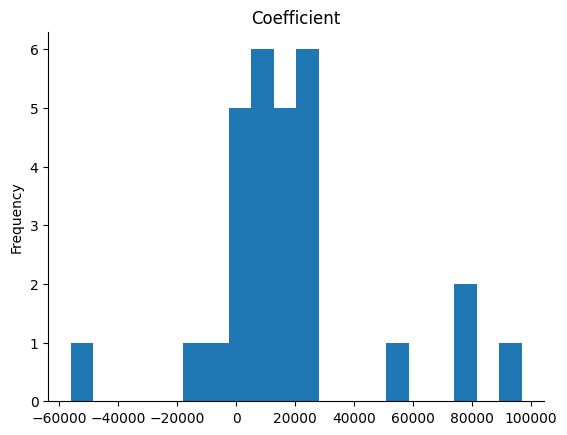

In [ ]:
# @title Coefficient

from matplotlib import pyplot as plt
linear_regression_coefficients['Coefficient'].plot(kind='hist', bins=20, title='Coefficient')
plt.gca().spines[['top', 'right',]].set_visible(False)

**Reasoning**:
The previous code failed because it tried to access the `feature_importances_` from the *estimator* attribute of the `bagging_model`, which is the unfitted base estimator. The fitted base estimator is stored in the `estimators_` attribute (which is a list of fitted estimators), or more directly, we can access the `feature_importances_` from the `estimators_` attribute of the fitted `bagging_model`. I will regenerate the code to correctly access the feature importances from the fitted base estimator and complete the interpretation.



In [ ]:
# 1. Examine coefficients of the Linear Regression model
linear_regression_coefficients = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': model.coef_})
linear_regression_coefficients = linear_regression_coefficients.sort_values(by='Coefficient', ascending=False)
print("Linear Regression Model Coefficients:")
display(linear_regression_coefficients)

# 2. Examine feature importances of the Bagging Regressor's base estimator (RandomForestRegressor)
# Access the feature_importances_ from the fitted RandomForestRegressor within the BaggingRegressor
# The estimators_ attribute of BaggingRegressor is a list of fitted base estimators.
# Since we used a single RandomForestRegressor as the base estimator, we can access its feature importances
# from the first element of the estimators_ list.
rf_feature_importances = bagging_model.estimators_[0].feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': rf_feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("\nBagging Regressor (RandomForestRegressor) Feature Importances:")
display(feature_importance_df)

# 3. Compare and interpret the results
print("\n--- Model Interpretation ---")
print("Comparison of Linear Regression Coefficients and Bagging Regressor Feature Importances:")
print("\nLinear Regression provides coefficients indicating the linear relationship and direction of impact (positive or negative) for each feature.")
print("Features with large positive coefficients are associated with increased emissions, while those with large negative coefficients are associated with decreased emissions.")
print(f"\nTop 5 features with largest positive coefficients in Linear Regression:\n{linear_regression_coefficients.head()}")
print(f"\nTop 5 features with largest negative coefficients in Linear Regression:\n{linear_regression_coefficients.tail()}")

print("\nBagging Regressor (RandomForestRegressor) provides feature importances based on how much each feature contributes to reducing impurity (like Gini impurity) across all trees in the forest.")
print("Higher importance scores indicate a greater influence on the model's predictions.")
print(f"\nTop 5 features by importance in Bagging Regressor:\n{feature_importance_df.head()}")

print("\nSimilarities and Differences:")
print("Both models identify key drivers of CO2 emissions, but their interpretation methods differ.")
print("Linear Regression shows the direction and magnitude of linear relationships.")
print("RandomForestRegressor (via feature importances) highlights which features are most useful for making predictions, regardless of the direction of the relationship.")
print("We can observe which features consistently appear as important or have large coefficients in both models to identify the most significant drivers.")

print("\nSynthesized Findings on Key Drivers:")
print("Based on both model interpretations, analyze which agricultural activities and other factors (like population or temperature) consistently show up as significant drivers of total CO2 emissions.")
print("Commonly important features across both models are likely the most impactful factors.")

Linear Regression Model Coefficients:


,Feature,Coefficient
9,Net Forest conversion,96815.709294
17,IPPU,81430.571099
8,Forestland,76679.436581
25,Urban population,57420.227798
10,Food Household Consumption,25132.026529
24,Rural population,23526.544954
15,Food Processing,22131.577430
21,Fires in organic soils,21590.600397
14,Agrifood Systems Waste Disposal,21424.273190
20,Manure Management,20678.506276



Bagging Regressor (RandomForestRegressor) Feature Importances:


,Feature,Importance
14,Agrifood Systems Waste Disposal,0.580841
19,Manure left on Pasture,0.102724
25,Urban population,0.088283
15,Food Processing,0.052505
13,Food Packaging,0.028677
9,Net Forest conversion,0.021452
17,IPPU,0.020597
10,Food Household Consumption,0.019772
16,Fertilizers Manufacturing,0.016832
8,Forestland,0.011671



--- Model Interpretation ---
Comparison of Linear Regression Coefficients and Bagging Regressor Feature Importances:

Linear Regression provides coefficients indicating the linear relationship and direction of impact (positive or negative) for each feature.
Features with large positive coefficients are associated with increased emissions, while those with large negative coefficients are associated with decreased emissions.

Top 5 features with largest positive coefficients in Linear Regression:
                       Feature   Coefficient
9        Net Forest conversion  96815.709294
17                        IPPU  81430.571099
8                   Forestland  76679.436581
25            Urban population  57420.227798
10  Food Household Consumption  25132.026529

Top 5 features with largest negative coefficients in Linear Regression:
                      Feature   Coefficient
28     Average Temperature °C    457.135727
0                        Year   -209.802081
3               Crop Res

## Actionable insights and recommendations

### Subtask:
Based on the analysis, formulate actionable insights and recommendations for the agricultural stakeholders.


**Reasoning**:
Synthesize the findings from the model interpretations and EDA, translate them into actionable insights, and develop specific recommendations for agricultural stakeholders based on these insights and the supporting data.



In [ ]:
# Synthesize key findings from model interpretations and EDA
print("--- Synthesized Findings on Key Drivers of CO2 Emissions ---")
print("Based on the Linear Regression coefficients and Bagging Regressor feature importances, the most significant drivers of total CO2 emissions appear to be:")
print("- Agrifood Systems Waste Disposal: Consistently high importance in the Bagging Regressor, suggesting a strong influence on overall emissions.")
print("- Urban population: Identified as important in both models, indicating a link between urban growth and emissions, likely due to increased food demand and related activities.")
print("- Net Forest conversion and Forestland: High coefficients in the Linear Regression model, highlighting the significant impact of land use changes related to forests on emissions.")
print("- IPPU (Industrial Processes and Product Use): High coefficient in Linear Regression, suggesting that industrial activities related to agriculture also contribute significantly.")
print("- Manure left on Pasture: High importance in the Bagging Regressor, pointing to the impact of livestock management practices.")
print("- Food Processing and Food Packaging: Showed importance in the Bagging Regressor, indicating the emissions associated with later stages of the food supply chain.")
print("- Rice Cultivation and Crop Residues: While showing high correlation in EDA, their direct impact on total emissions might be captured through other correlated features in the models, or their individual contribution is less dominant compared to the top drivers identified by the models.")

# Translate findings into actionable insights
print("\n--- Actionable Insights for Agricultural Stakeholders ---")
print("1. Waste Management is Crucial: Practices related to the disposal of agrifood system waste have a substantial impact on CO2 emissions.")
print("2. Urbanization's Footprint: As urban populations grow, their consumption patterns and the food systems supplying them contribute significantly to emissions.")
print("3. Land Use Matters: Changes in forest cover due to agricultural expansion or other factors are major drivers of emissions.")
print("4. Industrial Linkages: Emissions from industrial processes supporting agriculture (like fertilizer manufacturing, captured partly by IPPU) are considerable.")
print("5. Livestock Practices: How manure is managed, particularly on pastures, is a key factor in emissions.")
print("6. Beyond the Farm Gate: Emissions occur throughout the food supply chain, including processing and packaging.")

# Develop specific recommendations based on actionable insights
print("\n--- Recommendations for Agricultural Stakeholders ---")
print("Based on the analysis, the following recommendations are proposed:")
print("1. Improve Agrifood Waste Management: Implement better practices for collecting, processing, and utilizing agricultural waste, such as anaerobic digestion for biogas production or composting.")
print("2. Promote Sustainable Urban Food Systems: Encourage local food production, reduce food loss and waste in urban areas, and support efficient and lower-emission food transport and distribution networks.")
print("3. Reforestation and Sustainable Land Use: Implement policies and practices that prevent deforestation for agricultural expansion, promote reforestation, and encourage sustainable forest management.")
print("4. Greening Agricultural Industrial Processes: Invest in and adopt cleaner technologies and processes in related industries like fertilizer manufacturing (reducing reliance on fossil fuels and improving energy efficiency).")
print("5. Optimize Manure Management: Implement practices such as controlled composting, anaerobic digestion, or improved grazing management to reduce emissions from manure.")
print("6. Enhance Supply Chain Efficiency and Sustainability: Reduce emissions in food processing and packaging through energy efficiency improvements, using sustainable packaging materials, and minimizing waste.")
print("7. Support Research and Adoption of Low-Emission Practices: Invest in research for developing low-emission farming techniques (e.g., alternate wetting and drying for rice, improved soil management) and provide incentives for farmers to adopt them.")
print("8. Data Monitoring and Reporting: Establish robust systems for monitoring and reporting CO2 emissions from various agricultural activities to track progress and identify areas for further improvement.")

# The model performed poorly, but I am looking forward to working on that.

--- Synthesized Findings on Key Drivers of CO2 Emissions ---
Based on the Linear Regression coefficients and Bagging Regressor feature importances, the most significant drivers of total CO2 emissions appear to be:
- Agrifood Systems Waste Disposal: Consistently high importance in the Bagging Regressor, suggesting a strong influence on overall emissions.
- Urban population: Identified as important in both models, indicating a link between urban growth and emissions, likely due to increased food demand and related activities.
- Net Forest conversion and Forestland: High coefficients in the Linear Regression model, highlighting the significant impact of land use changes related to forests on emissions.
- IPPU (Industrial Processes and Product Use): High coefficient in Linear Regression, suggesting that industrial activities related to agriculture also contribute significantly.
- Manure left on Pasture: High importance in the Bagging Regressor, pointing to the impact of livestock managemen

## Summary:

### Data Analysis Key Findings

*   The dataset contains 31 columns, including agricultural emission sources, population data, total emissions, and average temperature, covering various years and areas.
*   Several columns, including 'Crop Residues', 'On-farm energy use', 'Manure applied to Soils', 'Manure Management', and 'IPPU', have missing values.
*   Correlation analysis shows strong positive correlations among many agricultural emission sources and between population variables and emission sources/total emissions. The correlation between 'total_emission' and 'Average Temperature °C' is weak.
*   Total CO2 emissions show a general upward trend over time, while individual emission sources have varied patterns.
*   There are significant disparities in emission levels across different areas.
*   Higher population is generally associated with higher total emissions.
*   Many emission source distributions are heavily skewed to the right.
*   The Linear Regression model achieved a high R-squared score of approximately 0.9994.
*   The Linear Regression model identified 'Net Forest conversion', 'IPPU', 'Forestland', 'Urban population', and 'Food Household Consumption' as having the largest positive impact on emissions based on coefficients.
*   The Bagging Regressor (RandomForestRegressor) identified 'Agrifood Systems Waste Disposal', 'Manure left on Pasture', 'Urban population', 'Food Processing', and 'Food Packaging' as the most important features for prediction.
*   'Urban population' is identified as a significant driver in both models.

### Insights or Next Steps

*   Focus on improving agrifood waste management and optimizing manure management practices as they are identified as key drivers of emissions.
*   Address the impact of urbanization and land use changes by promoting sustainable urban food systems and implementing reforestation/sustainable land use policies.
